## Checkpoint 3

### Aim

To write a Python program to explore the behaviour of a damped simple harmonic oscillator for a range of damping coefficients. This involves writing a program to trace out the amplitude against time for a damped simple harmonic oscillator under a range of conditions.

From a computing viewpoint this checkpoint demonstrates the use of *functions*, *loops*, *lists*, and the `Matplotlib pyplot` library for simple graph plotting.

### Mathematical Background

The damped simple harmonic oscillator satisfies the second order differential equation
$m\ddot{x} +b \dot{x} + kx=0$ where m is the mass of the oscillator, b is the coefficient of damping, and k is the spring constant.

Defining new constants
$\gamma$=b/m and $\omega_0^2$=k/m
we can re-write the differential equation as:

$$\ddot{x} + \gamma \dot{x} + \omega_{0}^2x =0 $$

where $ω_0$ is known as the natural frequency of the undamped oscillator.

The solutions to this equation take the following forms:

$$ x=\exp(−γt/2)[a\cosh(pt)+b\sinh(pt)]  \text{ when }  γ>2ω_0  \text{ with }  p^2=(γ^2/4)−ω^2_0 $$

$$ x=\exp(−γt/2)[a+bt]  \text{ when }  γ=2ω_0 $$

$$ x=\exp(−γt/2)[a\cos(ωt)+b\sin(ωt)] \text{ when }  γ<2ω_0  \text{ with } ω^2=ω^2_0−(γ^2/4)$$

where these three conditions are known as over damped, critically damped and under damped respectively.

Note: Read these equations *very* carefully and note the location of the parentheses.

With the initial conditions that x=1 and $\dot{x}$ =0 at t=0 the above constants, after some manipulation, become 

$$ a=1 \text{, } b=\gamma/2p \text{ when } \gamma>2ω_0 $$

$$ a=1 \text{, } b=\gamma/2 \text{ when } \gamma=2ω_0 $$

$$ a=1 \text{, } b=\gamma/2ω \text{ when } \gamma<2ω_0 $$

### Task

Write an interactive Python program to compute and display, using the pyplot function from Matplotlib, the solution for x against t for t in the range $0 \to 5\pi/ω_0$. Your program should:

- Ask for and read in the values of $ω_0$, $\gamma$ and the number of points to plot on the graph from the terminal.
- Use a function of form shm(omega_zero,gamma,t) to calculate the displacement.
- Calculate and plot the amplitude and time to lists
- Plot the output via pyplot with suitable title and labels to axis
- Look at the structure of the [FlightPlot](../CodeExamples/FlightPlot.ipynb) example for structure.

### Background

For this checkpoint you will need to have read and studied the following sections:

1. [Lists](../CourseNotes/simplelists.ipynb)
2. [Loops](../CourseNotes/loops.ipynb)
3. [Plotting](../CourseNotes/plotting.ipynb)

Note: The structure of this program is reasonably complex. Think carefully how you are going to structure it before you start. Also be very careful when coding the expression for the amplitude of the oscillation; in particular make sure it is performing the correct arithmetic (there is some helpful code for this included below).


### Checkpoint

- Test your program using the following input parameters:
    - Case 1: $\gamma=0.5 \text{ and } \omega_0=1.0$ for an under damped condition.  
    - Case 2: $\gamma=2.0 \text{ and } \omega_0=1.0$ for a critically damped condition.  
    - Case 3: $\gamma=20.0 \text{ and } \omega_0=1.0$ for an over damped condition.  
- To obtain a smooth plot you need to calculate the above expression for at least 200 evenly spaced values of t.
- Call a demonstrator, show them your code and run your program with the three sets of inputs above and any additional ones requested by the demonstrator.

### Assessment

To pass this checkpoint:

- The programme works correctly for at least two of the three cases and the output plotted via pyplot.
- The output graph has correct title and labels.
- The program uses a function of the form shm(omega_zero,gamma,t) to calculate the displacement.
- The program calculates and stores the amplitude and time in lists with a loop to iterate over the number of points for the plot.

### Next steps
Once you have completed this checkpoint, please continue with the [Week3](../WeeklyTasks/Week3.ipynb) tasklist.

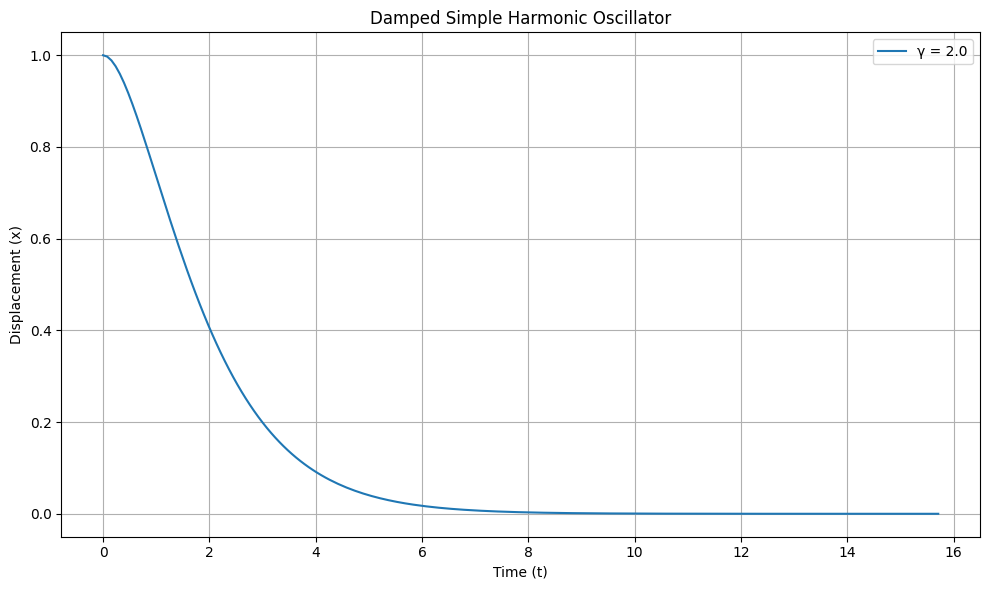

In [3]:
import math
import matplotlib.pyplot as plt

def shm(omega_zero, gamma, t):
    
    if gamma > 2 * omega_zero:
        # Overdamped
        p = math.sqrt((gamma**2) / 4 - omega_zero**2)
        a = 1
        b = gamma / (2 * p)
        x = math.exp(-gamma * t / 2) * (a * math.cosh(p * t) + b * math.sinh(p * t))
    elif gamma == 2 * omega_zero:
        # Critically damped
        a = 1
        b = gamma / 2
        x = math.exp(-gamma * t / 2) * (a + b * t)
    else:
        # Underdamped
        omega = math.sqrt(omega_zero**2 - (gamma**2) / 4)
        a = 1
        b = gamma / (2 * omega)
        x = math.exp(-gamma * t / 2) * (a * math.cos(omega * t) + b * math.sin(omega * t))
    return x

def main():  
    # Read inputs from the user
    try:
        gamma = float(input("Enter the damping coefficient γ"))
        omega_zero = float(input("Enter the natural frequency ω₀"))
        num_points = int(input("Enter the number of points to plot"))
     
        if omega_zero <= 0:
            raise ValueError("Natural frequency ω₀ must be positive.")
        if num_points < 2:
            raise ValueError("Number of points must be at least 2.")
    except ValueError as e:
        print(f"Input error: {e}")
        return

    # Define the time range from 0 to 5π/ω₀
    t_max = 5 * math.pi / omega_zero
    delta_t = t_max / (num_points - 1)  # Time step

    # Initialize lists to store time and displacement values
    t_list = []
    x_list = []

    # Calculate displacement for each time point
    for i in range(num_points):
        t = i * delta_t
        x = shm(omega_zero, gamma, t)
        t_list.append(t)
        x_list.append(x)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t_list, x_list, label=f'γ = {gamma}')
    plt.title('Damped Simple Harmonic Oscillator')
    plt.xlabel('Time (t)')
    plt.ylabel('Displacement (x)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()